## Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

## Importing the Dataset

In [4]:
isro = pd.read_csv("isro.csv")

In [5]:
isro2 = isro.copy()

In [6]:
isro.shape

(1000000, 15)

In [7]:
isro.head()

,Celestial Body,Distance from Earth (M km),Iron (%),Nickel (%),Water Ice (%),Other Minerals (%),Estimated Value (B USD),Sustainability Index,Efficiency Index,Potential Mining Site,Gravity (m/s²),Surface Temperature (K),Orbital Period (days),Rotation Period (hours),Axial Tilt (degrees)
0,Europa,642.933081,11.483867,1.994606,6.678221,79.843306,44.829297,60.813969,64.356215,True,23.778817,429.976509,2589.490005,518.409504,89.246105
1,Ganymede,472.073374,15.689480,10.364329,10.845723,63.100468,33.240823,27.658233,81.055578,False,8.041982,467.093952,1586.585372,479.698872,35.658557
2,Mars,849.155224,7.381894,1.740230,19.694838,71.183038,54.211806,39.303785,75.314698,False,11.392500,489.317826,949.812539,656.392110,10.315619
3,Ganymede,359.054825,25.820767,11.145742,3.170590,59.862900,65.193925,40.490625,75.138513,False,14.869186,363.435222,4805.914760,52.752981,85.843194
4,Ganymede,777.456918,7.600523,7.908855,13.765708,70.724915,65.507641,24.506810,33.598366,False,24.318341,295.747858,8586.766242,400.173308,9.758053


## Checking Data Types and Null Values

In [8]:
isro.dtypes

Celestial Body                 object
Distance from Earth (M km)    float64
Iron (%)                      float64
Nickel (%)                    float64
Water Ice (%)                 float64
Other Minerals (%)            float64
Estimated Value (B USD)       float64
Sustainability Index          float64
Efficiency Index              float64
Potential Mining Site            bool
Gravity (m/s²)                float64
Surface Temperature (K)       float64
Orbital Period (days)         float64
Rotation Period (hours)       float64
Axial Tilt (degrees)          float64
dtype: object

In [9]:
isro.isnull().sum()

Celestial Body                0
Distance from Earth (M km)    0
Iron (%)                      0
Nickel (%)                    0
Water Ice (%)                 0
Other Minerals (%)            0
Estimated Value (B USD)       0
Sustainability Index          0
Efficiency Index              0
Potential Mining Site         0
Gravity (m/s²)                0
Surface Temperature (K)       0
Orbital Period (days)         0
Rotation Period (hours)       0
Axial Tilt (degrees)          0
dtype: int64

In [10]:
isro.isna().sum()

Celestial Body                0
Distance from Earth (M km)    0
Iron (%)                      0
Nickel (%)                    0
Water Ice (%)                 0
Other Minerals (%)            0
Estimated Value (B USD)       0
Sustainability Index          0
Efficiency Index              0
Potential Mining Site         0
Gravity (m/s²)                0
Surface Temperature (K)       0
Orbital Period (days)         0
Rotation Period (hours)       0
Axial Tilt (degrees)          0
dtype: int64

## Column Names and Description

|Index|Old Name|New Name|Unit|Description|
|:---:|:------|:------|:--|:---------|
|0| Celestial body|body|None|Name of the Celestial Body|
|1| Distance from earth (m km)|distance|Million Kms|Distance of the Celestial Body from Earth|
|2| Iron (%)|iron|Percentage(%)|Percentage Composition of Iron|
|3| Nickel (%)|nickel|Percentage(%)|Percentage Composition of Nickel|
|4| Water ice (%)| water_ice|Percentage(%)|Percentage Composition of Water Ice|
|5| Other minerals (%)|other_minerals|Percentage(%)|Percentage Composition of Other Minerals|
|6| Estimated value (b usd)|value|Billion USD|Estimated monetary worth of the resources that could be extracted|
|7| Sustainability index|sustainability|Range (1-100)|Assess the overall sustainability of Mining Practice|
|8| Efficiency index|efficiency|Range (1-100)|How effectively resources are utilized during the mining process|
|9| Potential mining site|mining|Boolean|Whether the Celestial Body is a Potential mining site or not|
|10| Gravity (m/s²)|gravity|m/s^2|Gravity on the Celestial Body|
|11| Surface temperature (k)|temp|Kelvin|Temperature on the Surace of the Celestial body|
|12| Orbital period (days)|orbit|days|Number of days the Celestial body takes to one full orbit|
|13| Rotation period (hours)|rotation|hours|Time it takes for the Celestial body to complete one full rotation around its own axis|
|14| Axial tilt (degrees)|tilt|degrees|Axis tilt of the Celestial body|

### Renaming Columns

In [11]:
isro = isro.rename(columns={
    'Celestial Body' : "body",
    'Distance from Earth (M km)' : "distance",
    'Iron (%)' : "iron",
    'Nickel (%)' : "nickel",
    'Water Ice (%)' : "water_ice",
    'Other Minerals (%)' : "other",
    'Estimated Value (B USD)' : "value",
    'Sustainability Index' : "sustainability",
    'Efficiency Index' : "efficiency",
    'Potential Mining Site' : "mining",
    'Gravity (m/s²)' : "gravity",
    'Surface Temperature (K)' : "temp",
    'Orbital Period (days)' : "orbit",
    'Rotation Period (hours)' : "rotation",
    'Axial Tilt (degrees)' : "tilt"
})

isro.columns

Index(['body', 'distance', 'iron', 'nickel', 'water_ice', 'other', 'value',
       'sustainability', 'efficiency', 'mining', 'gravity', 'temp', 'orbit',
       'rotation', 'tilt'],
      dtype='object')

### Re-ordering the columns

In [93]:
for i in enumerate(list(isro.columns)):
    print(i)

(0, 'body')
(1, 'tilt')
(2, 'gravity')
(3, 'water_ice')
(4, 'temp')
(5, 'other')
(6, 'distance')
(7, 'efficiency')
(8, 'mining')
(9, 'iron')
(10, 'nickel')
(11, 'value')
(12, 'sustainability')
(13, 'rotation')
(14, 'orbit')


In [100]:
isro = isro[['body', 'mining', 'distance', 'temp', 'gravity', 'iron', 'nickel', 'water_ice', 'other', 'value', 'tilt', 'orbit', 'rotation', 'efficiency']]

In [101]:
isro.head(2)

,body,mining,distance,temp,gravity,iron,nickel,water_ice,other,value,tilt,orbit,rotation,efficiency
0,Europa,True,642.933081,429.976509,23.778817,11.483867,1.994606,6.678221,79.843306,44.829297,89.246105,2589.490005,518.409504,64.356215
1,Ganymede,False,472.073374,467.093952,8.041982,15.689480,10.364329,10.845723,63.100468,33.240823,35.658557,1586.585372,479.698872,81.055578


In [102]:
isro.describe()

,distance,temp,gravity,iron,nickel,water_ice,other,value,tilt,orbit,rotation,efficiency
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,524.823192,375.050713,12.556742,22.496477,8.003163,14.996044,54.504316,55.900963,44.994056,4998.371803,500.800580,64.996452
std,274.147968,187.636500,7.189038,10.105533,4.043015,8.660267,13.907402,13.891214,25.977456,2883.970361,288.322968,20.203471
min,50.000359,50.000249,0.100022,5.000035,1.000019,0.000012,15.256663,14.905954,0.000062,1.019777,1.000467,30.000033
25%,287.659575,212.453333,6.329503,13.742728,4.503428,7.497026,44.559517,45.524667,22.501093,2502.649347,250.798947,47.510534
50%,524.519692,375.134188,12.562901,22.499629,8.006217,14.983074,54.490893,55.903735,45.003652,4999.630211,500.930457,64.990360
75%,762.253884,537.483439,18.780793,31.239831,11.500805,22.504273,64.459976,66.254729,67.496980,7493.466654,750.585031,82.494809
max,999.999413,699.999669,24.999994,39.999926,14.999998,29.999918,93.541423,96.971740,89.999976,9999.993735,999.998821,99.999907


## To check whether the total composition of minerals add up to 100

In [16]:
sum(isro.body[round(isro.iron+isro.nickel+isro.water_ice+isro.other, 6) != 100])

0

## List of the Celestial Bodies

In [17]:
isro.body.unique()

array(['Europa', 'Ganymede', 'Mars', 'Moon', 'Asteroid'], dtype=object)

Europa - Jupiter's 4th largest Moon \
Ganymede - Jupiter's largest moon (and our solar system also) \
Moon - Earth's Moon \
Mars - Planet \
Asteroid - 

In [18]:
isro.body.value_counts()

body
Ganymede    200379
Moon        199970
Mars        199962
Asteroid    199918
Europa      199771
Name: count, dtype: int64

## How many Sites can actually be mined?

In [ ]:
isro.mining.value_counts()

mining
False    673347
True     326653
Name: count, dtype: int64

In [75]:
mining_percentage = isro.mining.value_counts().iloc[1] / (isro.mining.value_counts().iloc[1] + isro.mining.value_counts().iloc[0])

print(f"Only {mining_percentage*100}% of the sites can be mined")

Only 32.6653% of the sites can be mined


## Find the average values of all the columns grouped by the type of celestial body

In [41]:
body_group_means = isro.groupby(['body']).mean()
body_group_means

,iron,nickel,distance,tilt,efficiency,mining,gravity,water_ice,other,value,sustainability,rotation,temp,orbit
body,,,,,,,,,,,,,,
Asteroid,22.485218,8.005539,524.520746,44.947106,65.088234,0.329530,12.551402,14.972364,54.536879,55.903176,55.104000,500.619065,375.251801,5000.261389
Europa,22.502609,7.998459,524.236247,44.967244,64.971958,0.325257,12.569456,15.002738,54.496193,55.887681,54.944884,500.587614,374.980687,5002.487069
Ganymede,22.489256,8.009354,524.808094,44.995803,65.013129,0.325967,12.589566,15.019659,54.481730,55.937727,54.954982,501.740142,375.136235,4998.744373
Mars,22.503813,8.007132,524.632450,45.106388,64.979531,0.325837,12.516533,14.999128,54.489927,55.911202,54.925241,500.038409,374.878489,4992.070390
Moon,22.501507,7.995316,525.917781,44.953702,64.929374,0.326674,12.556694,14.986282,54.516895,55.864943,54.990489,501.015458,375.006155,4998.299366


In [42]:
body_group_std = isro.groupby(['body']).std()
body_group_std

,iron,nickel,distance,tilt,efficiency,mining,gravity,water_ice,other,value,sustainability,rotation,temp,orbit
body,,,,,,,,,,,,,,
Asteroid,10.099163,4.039088,274.059478,25.980556,20.192809,0.470044,7.198043,8.660678,13.890022,13.866613,20.222471,288.549972,187.457255,2881.300741
Europa,10.092268,4.046452,274.074565,25.991952,20.181851,0.468472,7.184248,8.663778,13.924020,13.885236,20.200860,288.049303,187.731841,2883.832786
Ganymede,10.108672,4.040222,274.614785,25.993413,20.208289,0.468736,7.192197,8.665216,13.867462,13.885780,20.239789,288.645557,187.656653,2884.024031
Mars,10.127281,4.041566,273.815582,25.967097,20.243824,0.468688,7.188289,8.661472,13.955889,13.915245,20.212752,288.284254,187.615911,2884.864778
Moon,10.100309,4.047770,274.173435,25.954155,20.190344,0.468998,7.182263,8.650189,13.899616,13.903179,20.217369,288.084504,187.722366,2885.844959


In [43]:
body_group_count = isro.groupby(['body']).count()
body_group_count

,iron,nickel,distance,tilt,efficiency,mining,gravity,water_ice,other,value,sustainability,rotation,temp,orbit
body,,,,,,,,,,,,,,
Asteroid,199918,199918,199918,199918,199918,199918,199918,199918,199918,199918,199918,199918,199918,199918
Europa,199771,199771,199771,199771,199771,199771,199771,199771,199771,199771,199771,199771,199771,199771
Ganymede,200379,200379,200379,200379,200379,200379,200379,200379,200379,200379,200379,200379,200379,200379
Mars,199962,199962,199962,199962,199962,199962,199962,199962,199962,199962,199962,199962,199962,199962
Moon,199970,199970,199970,199970,199970,199970,199970,199970,199970,199970,199970,199970,199970,199970


## Distribution of Columns using Histogram

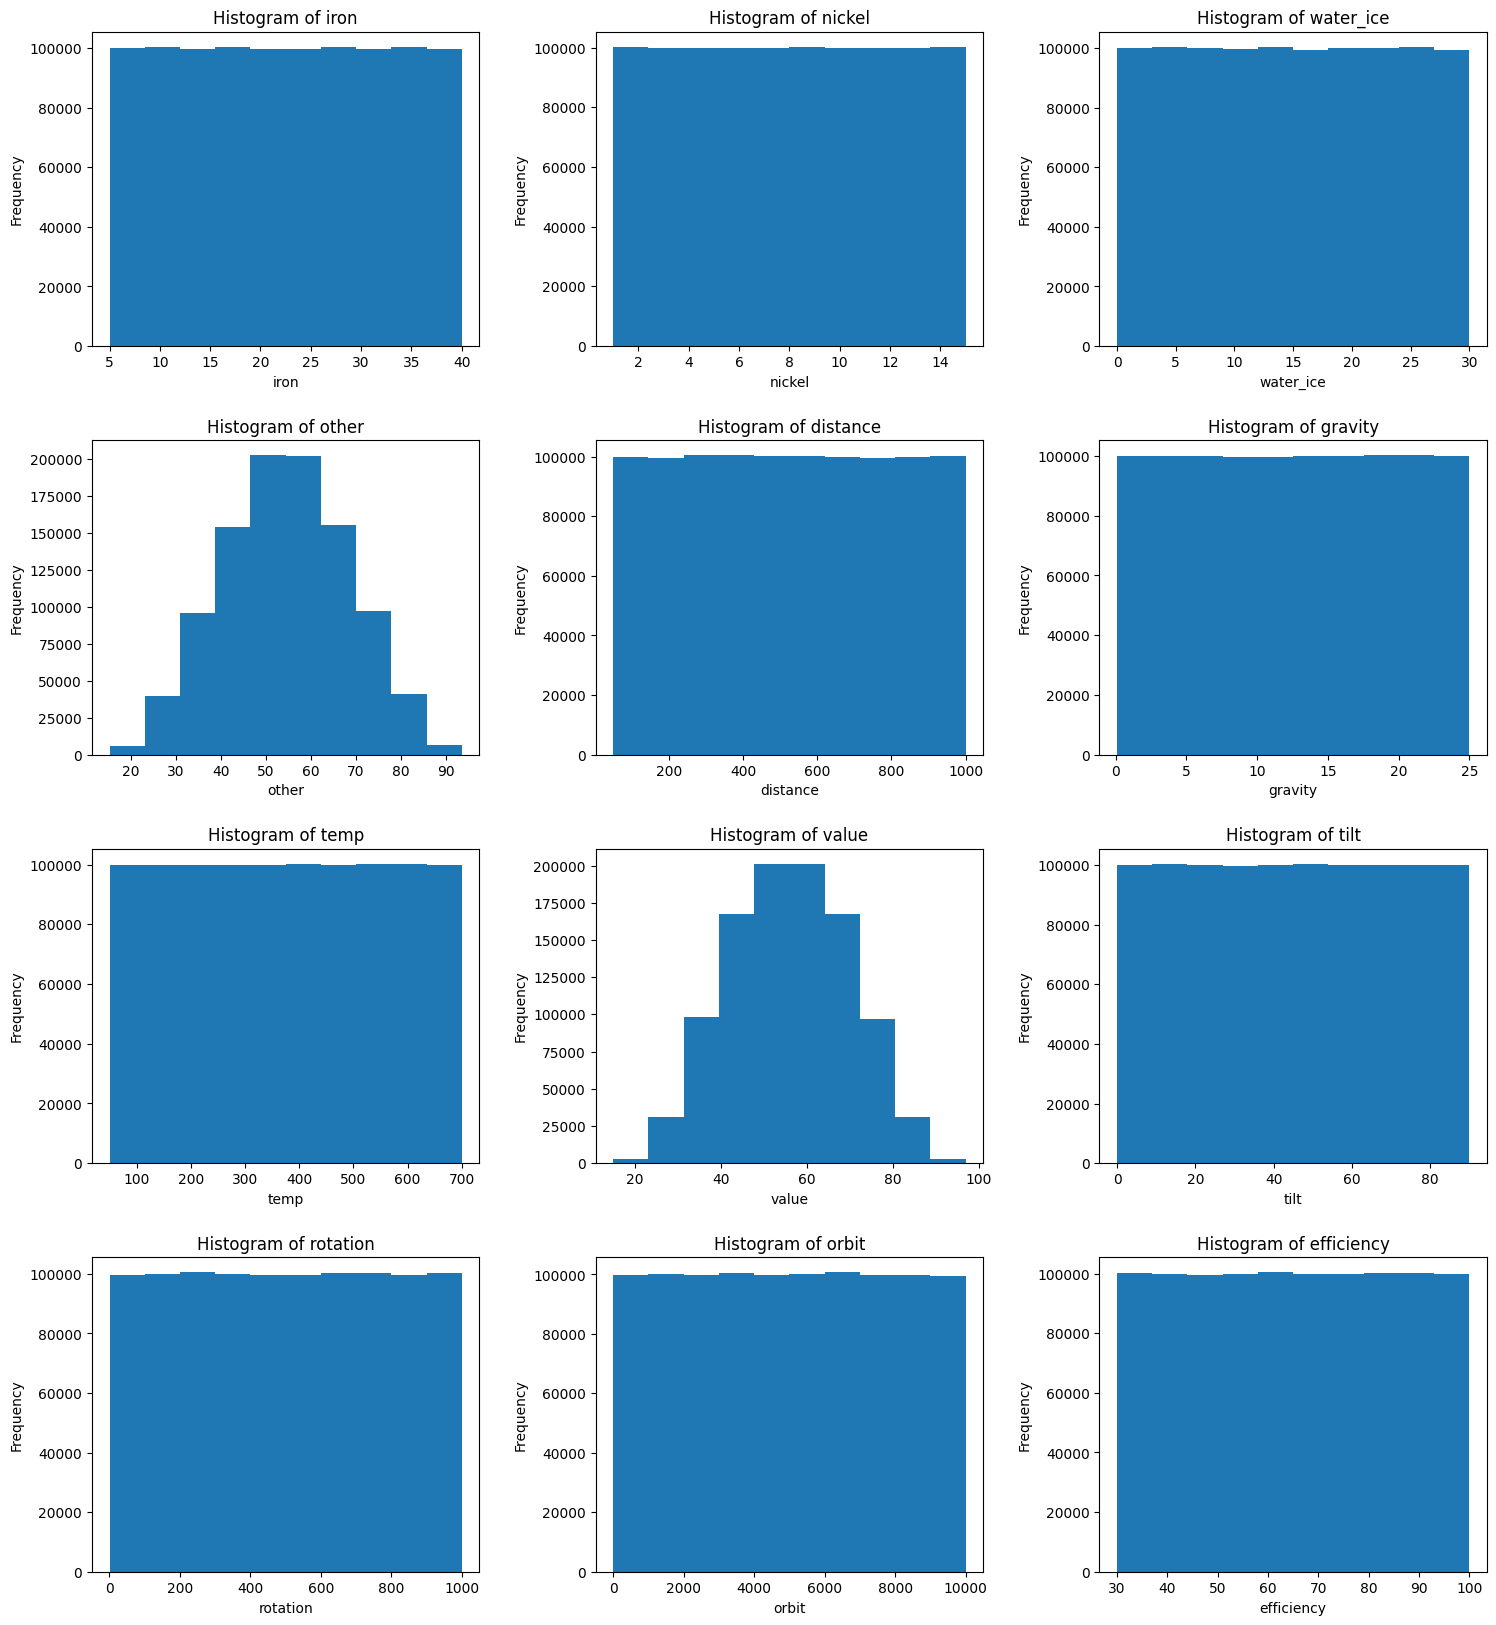

In [106]:
fig, ax = plt.subplots(4, 3, figsize = (18, 20))

# List of Columns for which we want to plot the histogram

colnames = ['iron',                     
 'nickel',
 'water_ice',
 'other',
 'distance',
 'gravity',
 'temp',
 'value',
 'tilt',
 'rotation',
 'orbit',
 'efficiency'
]

colnumber = 0


for i in range(4):
    for j in range(3):
        ax[i, j].hist(isro[colnames[colnumber]])
        ax[i, j].set_title(f"Histogram of {colnames[colnumber]}")
        ax[i, j].set_xlabel(colnames[colnumber])
        ax[i, j].set_ylabel('Frequency')
        colnumber += 1

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

The above histograms suggest that: \
Percentage of other minerals and Estimated Value have a Normal Distribution \
All others have Uniform Distribution


##  ANOVA Test for finding whether there is a significant difference in the distance of different celestial bodies from Earth

In [44]:
from scipy.stats import f

# Summary statistics
means = body_group_means[['distance']]
stds = body_group_std[['distance']]
ns = body_group_count[['distance']]

# Compute the overall mean
overall_mean = np.sum(means * ns, axis=0) / np.sum(ns, axis=0)

# Compute the between-group sum of squares (SSB)
ssb = np.sum(ns * (means - overall_mean)**2, axis=0)

# Compute the within-group sum of squares (SSW)
ssw = np.sum((ns - 1) * stds**2, axis=0)

# Compute degrees of freedom
df_between = len(means) - 1
df_within = np.sum(ns, axis=0) - len(means)

# Compute mean squares
msb = ssb / df_between
msw = ssw / df_within

# Compute F-statistic
f_statistic = msb / msw

p_value = 1 - f.cdf(f_statistic, df_between, df_within)

# Display the results
print(f"F-statistic: {f_statistic.iloc[0]:.2f}")
print(f"Degrees of freedom between: {df_between}")
print(f"Degrees of freedom within: {df_within.iloc[0]}")
print(f"P-value: {p_value[0]:.4f}")


F-statistic: 1.11
Degrees of freedom between: 4
Degrees of freedom within: 999995
P-value: 0.3492


A p-value of 0.3492 suggests that there is **not a significant differene** in the distance between the 5 Celestial Bodies

We can also extend the ANOVA test for testing the significance of other columns such as whether there is a significant difference between the temperatures at different celestial bodies, orbital periods etc.

## Correlation Matrix

In [107]:
corr_matrix = isro.corr(numeric_only=True)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).stack().sort_values(ascending=False))
best_corr = sol.to_frame().head(8)
best_corr

,,0
mining,efficiency,0.517033
iron,value,0.438477
water_ice,value,0.250577
nickel,value,0.232737
distance,rotation,0.002572
nickel,orbit,0.002537
other,rotation,0.001854
water_ice,efficiency,0.001759


In terms of Numeric Data, we can see that as we get more Minerals, namely Iron, Nickel and Water Ice, we get a positive correlation with the values. This is true as the more we have the mineral deposits, the more is the value in billion dollars.

## Classification of whether a site can be mined or not

In [171]:
X_train, X_test, y_train, y_test = train_test_split(isro[
['iron',
 'nickel',
 'water_ice',
 'other',
 'distance',
 'gravity',
 'temp',
 'tilt',
 'rotation',
 'orbit',
 'efficiency'
]], isro.mining, test_size=0.2, random_state=42)

In [172]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [173]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [195]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 71.34%


Accuracy can be improved

In [194]:
print(f"Confusion Matrix:\n\tTrue  False \nTrue {confusion_matrix(y_test, y_pred)[0]} \nFalse {confusion_matrix(y_test, y_pred)[1]}")

Confusion Matrix:
	True  False 
True [109778  24890] 
False [32423 32909]
